## a-AlphaBio homework 
### Run inference with some of the trained models
### Mark Thompson
### Started April 29, 2024 

In [1]:
%load_ext autoreload

In [2]:
%autoreload
# import libraries
import numpy as np
import pickle as pk
import pandas as pd
import math
import os
import matplotlib.pyplot as plt
%matplotlib inline

---------
### Holdout dataset

In [3]:
# The holdout data
data_file = '../data/alphaseq_data_hold_out.csv'
df = pd.read_csv(data_file)
rows1 = df.shape[0]
print('holdout dataframe has', rows1, 'rows')
print(df.columns.tolist())
print(df['sequence_a'].describe())

holdout dataframe has 30071 rows
['description_a', 'sequence_a', 'description_alpha', 'sequence_alpha']
count                                                 30071
unique                                                29971
top       QVQLVQSGVEVKKPGASVKVSCKASGYTFTNYYMYWVRQAPGQGLE...
freq                                                    101
Name: sequence_a, dtype: object


In [46]:
import torch
import torch.nn as nn

# Some plotting functions
#
def plot_preds_hist(preds_file_path):
    preds = pk.load(open(preds_file_path, 'rb'))
    print('len(preds):', len(preds))
    preds = [p[0] for p in preds]
    print('preds[0:10]:', preds[0:10])

    # Histogram of predicted values
    plt.hist(preds, bins=100)
    plt.xlabel('pred Kd (nm)')
    plt.ylabel('count')
    plt.title('Distribution of pred values on holdout set')
    plt.show()


def plot_pred_vs_true(preds_file_path, true_file_path, xlim=(0,5), ylim=(0,5)):
    preds = pk.load(open(preds_file_path, 'rb'))
    y = pk.load(open(true_file_path, 'rb'))
    print('len(preds):', len(preds), ', len(y):', len(y))
    preds = [p[0] for p in preds]
    y = [a[0] for a in y]

    # scatter plot of true vs pred
    plt.scatter(y, preds, c ="blue")
    plt.xlabel('experimental Kd (nm)')
    plt.ylabel('predicted Kd (nm)')
    plt.title('true vs predicted Kd on validation set')
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.show()

# Some error values
def print_errors(preds_file_path, true_file_path):
    preds = pk.load(open(preds_file_path, 'rb'))
    y = pk.load(open(true_file_path, 'rb'))
    print('len(preds):', len(preds), ', len(y):', len(y))
    preds = [p[0] for p in preds]
    y = [a[0] for a in y]

    # RMSE
    rmse = math.sqrt(np.mean((np.array(y) - np.array(preds))**2))
    print('rmse:', rmse)

    # MSE
    mse = np.mean((np.array(y) - np.array(preds))**2)
    print('mse:', mse)

    mse2 = nn.MSELoss()(torch.tensor(preds), torch.tensor(y))
    print('mse2:', mse2)

    # MAE
    mae = np.mean(np.abs(np.array(y) - np.array(preds)))
    print('mae:', mae) 

    # Mean and standard deviation of the error
    mean = np.mean(np.array(y) - np.array(preds))
    std = np.std(np.array(y) - np.array(preds))
    print('Error: mean:', mean, ', std:', std)

    # Mean of the absolute percentage error
    mape = np.mean(np.abs(np.array(y) - np.array(preds))/np.array(y))
    print('mape:', mape)

    # PPE10: percentage of time the prediction is within 10 percent of the ground truth
    ppe10 = np.mean(np.abs(np.array(y) - np.array(preds))/np.array(y) < 0.1)
    print('ppe10:', ppe10)

    


----
### MLP model

In [ ]:
pred_file_path = '../inference_results/preds_mlp.pkl'
plot_preds_hist(pred_file_path)

In [ ]:
pred_file_path = '../inference_results/preds_mlp_1714519460.345232.pkl'
true_file_path = '../inference_results/y_mlp_1714519460.3456798.pkl'
plot_pred_vs_true(pred_file_path, true_file_path)

----
### Dense MLP model

In [ ]:
pred_file_path = '../inference_results/preds_dense_mlp.pkl'
plot_preds_hist(pred_file_path)

In [ ]:
# Inference on the validation set to compare actual with predicted values
pred_file_path = '../inference_results/preds_dense_mlp_1714520055.8448465.pkl'
true_file_path = '../inference_results/y_dense_mlp_1714520055.845317.pkl'
plot_pred_vs_true(pred_file_path, true_file_path)

----
### Residual MLP

In [ ]:
pred_file_path = '../inference_results/preds_residual_mlp_1714622884.672657.pkl'
plot_preds_hist(pred_file_path)

In [ ]:
# Inference on the validation set to compare actual with predicted values
pred_file_path = '../inference_results/preds_residual_mlp_1714622963.854741.pkl'
true_file_path = '../inference_results/y_residual_mlp_1714622963.855089.pkl'
plot_pred_vs_true(pred_file_path, true_file_path)

----
### Residual MLP Clean-3 Dataset

In [ ]:
pred_file_path = ''
plot_preds_hist(pred_file_path)

len(preds): 925 , len(y): 925
rmse: 0.5666879593971667
mse: 0.32113524332572485
mse2: tensor(0.3211)
mae: 0.4374496417271124
Error: mean: 0.08164420802850982 , std: 0.5607757721417022
mape: 0.2678083844124641
ppe10: 0.3254054054054054
len(preds): 925 , len(y): 925


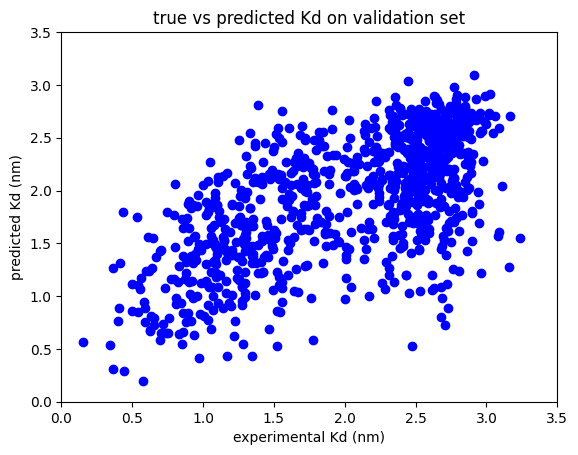

In [53]:
# Inference on the validation set to compare actual with predicted values
pred_file_path = '../inference_results/residual_mlp/cleaned-3/preds_residual_mlp_1714757964.5337942.pkl'
true_file_path = '../inference_results/residual_mlp/cleaned-3/y_residual_mlp_1714757964.534088.pkl'
print_errors(pred_file_path, true_file_path)
plot_pred_vs_true(pred_file_path, true_file_path, xlim=(0,3.5), ylim=(0,3.5))

-------
### Vision Transform Model (VIT)  1-channel Clean-3 Dataset

In [ ]:
pred_file_path = ''
plot_preds_hist(pred_file_path)

len(preds): 925 , len(y): 925
rmse: 0.3910416026398489
mse: 0.15291353499514146
mse2: tensor(0.1529)
mae: 0.28369017336819624
Error: mean: 0.04496103351180618 , std: 0.38844824682406753
mape: 0.1673989107966199
ppe10: 0.4627027027027027
len(preds): 925 , len(y): 925


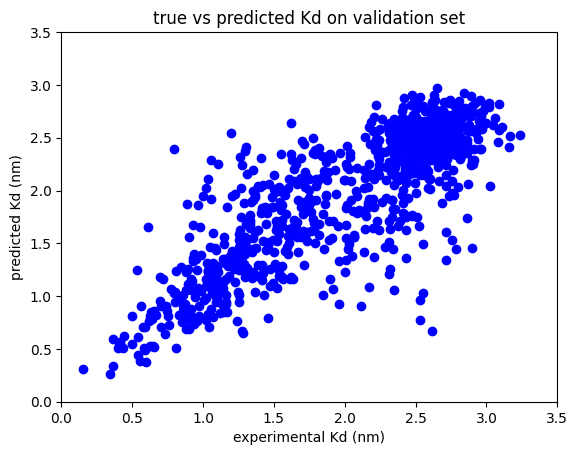

In [52]:
# Inference on the validation set to compare actual with predicted values
pred_file_path = '../inference_results/vit_model/cleaned-3/BW/preds_vit_1714868230.7190938.pkl'
true_file_path = '../inference_results/vit_model/cleaned-3/BW/y_vit_1714868230.7193077.pkl'
print_errors(pred_file_path, true_file_path)
plot_pred_vs_true(pred_file_path, true_file_path, xlim=(0,3.5), ylim=(0,3.5))


----
### Vision Transformer 3-channel,  Clean-3 Dataset

len(preds): 925 , len(y): 925
rmse: 0.35747824428903346
mse: 0.12779069513996988
mse2: tensor(0.1278)
mae: 0.2563205885887146
Error: mean: 0.009215544752172521 , std: 0.357359439325297
mape: 0.1512050793034056
ppe10: 0.5027027027027027
len(preds): 925 , len(y): 925


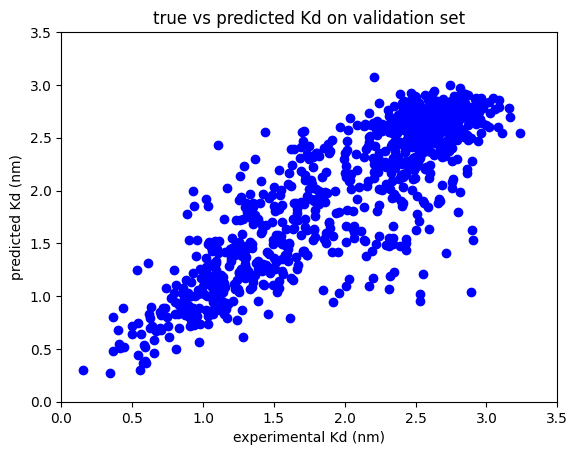

In [47]:
# Inference on the validation set to compare actual with predicted values
pred_file_path = '../inference_results/vit_model/cleaned-3/BGR/preds_vit_1714883259.9500844.pkl'
true_file_path = '../inference_results/vit_model/cleaned-3/BGR/y_vit_1714883259.9503129.pkl'
print_errors(pred_file_path, true_file_path)
plot_pred_vs_true(pred_file_path, true_file_path, xlim=(0,3.5), ylim=(0,3.5))



----
### TFormMLP model with residualMLP regression head. Clean-3 Dataset 

len(preds): 925 , len(y): 925
rmse: 0.3798670452464072
mse: 0.14429897206423598
mse2: tensor(0.1443)
mae: 0.2675300403543421
Error: mean: -0.003504794674950677 , std: 0.37985087663255745
mape: 0.1586843526956219
ppe10: 0.4983783783783784
len(preds): 925 , len(y): 925


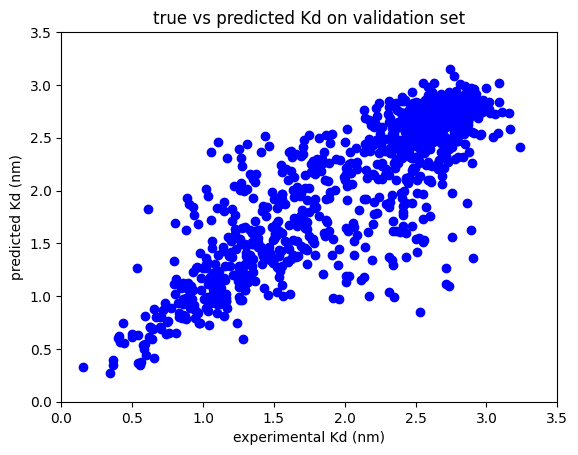

In [51]:
pred_file_path = '../inference_results/tform_mlp_model/cleaned-3/preds_tform_mlp_1714915311.9102216.pkl'
true_file_path = '../inference_results/tform_mlp_model/cleaned-3/y_tform_mlp_1714915311.9104567.pkl'
print_errors(pred_file_path, true_file_path)
plot_pred_vs_true(pred_file_path, true_file_path, xlim=(0,3.5), ylim=(0,3.5))

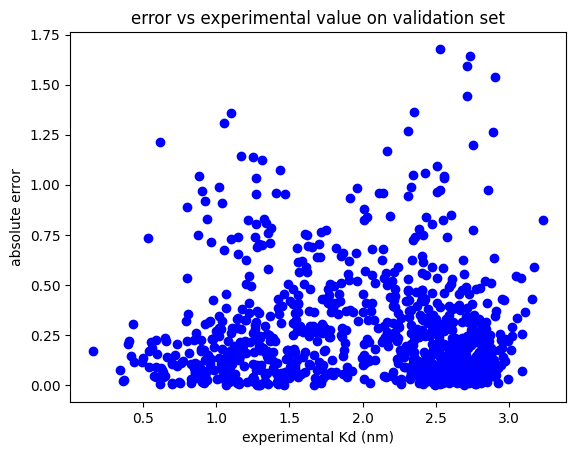

In [28]:
# Plot absolute error vs experimental Kd
preds = pk.load(open('../inference_results/tform_mlp_model/cleaned-3/preds_tform_mlp_1714915311.9102216.pkl', 'rb'))
truth = pk.load(open('../inference_results/tform_mlp_model/cleaned-3/y_tform_mlp_1714915311.9104567.pkl', 'rb'))

# scatter plot of true vs pred
plt.scatter(truth, np.abs(np.array(preds)-np.array(truth)), c ="blue")
plt.xlabel('experimental Kd (nm)')
plt.ylabel('absolute error')
plt.title('error vs experimental value on validation set')
# plt.xlim(xlim)
# plt.ylim(ylim)
plt.show()

----
### BERT
Unfreeze last 3 layers of transformer


In [ ]:
pred_file_path = '''
plot_preds_hist(pred_file_path)

In [ ]:
# Inference on the validation set to compare actual with predicted values
pred_file_path = '../inference_results/bert/clean_3_dataset/unfreeze_last_3_layers/preds_bert_1714674435.8165665.pkl'
true_file_path = '../inference_results/bert/clean_3_dataset/unfreeze_last_3_layers/y_bert_1714674435.8167834.pkl'
plot_pred_vs_true(pred_file_path, true_file_path, xlim=(0,4), ylim=(0,4))

----
### BERT
All layers of transformer are frozen


In [ ]:
# Inference on the validation set to compare actual with predicted values
pred_file_path = '../inference_results/bert/clean_3_dataset/unfreeze_last_0_layers/preds_bert_1714675343.229837.pkl'
true_file_path = '../inference_results/bert/clean_3_dataset/unfreeze_last_0_layers/y_bert_1714675343.2300615.pkl'
plot_pred_vs_true(pred_file_path, true_file_path, xlim=(0,4), ylim=(0,4))